## `Section 04: Merging Ordered and Time-Series Data`


### 01-Correlation between GDP and S&P500

* Use `merge_ordered()` to merge `gdp` and `sp500` using a left join on `year` and `date`. Save the results as `gdp_sp500`.
* Print `gdp_sp500` and look at the returns for the year 2018.

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

with open("dataset/gdp.csv", "rb") as f1, open("dataset/sp500.csv", "rb") as f2:
    gdp = pd.read_csv(f1, index_col=0)
    sp500 = pd.read_csv(f2, index_col=0)


In [2]:
# Use merge_ordered() to merge gdp and sp500 on year and date
gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on="year", right_on="date", 
                             how="left")

# Print gdp_sp500
print(gdp_sp500)

  country code  year           gdp    date  returns
0          USA  2010  1.500000e+13  2010.0    12.78
1          USA  2011  1.550000e+13  2011.0     0.00
2          USA  2012  1.620000e+13  2012.0    13.41
3          USA  2012  1.620000e+13  2012.0    13.41
4          USA  2013  1.680000e+13  2013.0    29.60
5          USA  2014  1.750000e+13  2014.0    11.39
6          USA  2015  1.820000e+13  2015.0    -0.73
7          USA  2016  1.870000e+13  2016.0     9.54
8          USA  2017  1.950000e+13  2017.0    19.42
9          USA  2018  2.050000e+13     NaN      NaN


* Use `merge_ordered()`, again similar to before, to merge `gdp` and `sp500` use the function's ability to interpolate missing data to forward fill the missing value for returns, assigning this table to the variable `gdp_sp500`.



In [3]:
# Use merge_ordered() to merge gdp and sp500, interpolate missing value
gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on="year", right_on="date", 
                             how="left", fill_method='ffill')


# Print gdp_sp500
print (gdp_sp500)

  country code  year           gdp  date  returns
0          USA  2010  1.500000e+13  2010    12.78
1          USA  2011  1.550000e+13  2011     0.00
2          USA  2012  1.620000e+13  2012    13.41
3          USA  2012  1.620000e+13  2012    13.41
4          USA  2013  1.680000e+13  2013    29.60
5          USA  2014  1.750000e+13  2014    11.39
6          USA  2015  1.820000e+13  2015    -0.73
7          USA  2016  1.870000e+13  2016     9.54
8          USA  2017  1.950000e+13  2017    19.42
9          USA  2018  2.050000e+13  2017    19.42


* Subset the `gdp_sp500` table, select the `gdp` and `returns` columns, and save as `gdp_returns`.
* Print the correlation matrix of the `gdp_returns` table.

In [4]:
# Use merge_ordered() to merge gdp and sp500, interpolate missing value
gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on='year', right_on='date', 
                             how='left',  fill_method='ffill')

# Subset the gdp and returns columns
gdp_returns = gdp_sp500[["gdp","returns"]]

# Print gdp_returns correlation
print (gdp_returns.corr())

              gdp   returns
gdp      1.000000  0.220321
returns  0.220321  1.000000


### 02-Phillips curve using merge_ordered()

* Use `merge_ordered()` to merge the `inflation` and `unemployment` tables on `date` with an inner join, and save the results as `inflation_unemploy`.
* Print the `inflation_unemploy` variable.
* Using `inflation_unemploy`, create a scatter plot with `unemployment_rate` on the horizontal axis and `cpi` (inflation) on the vertical axis.


In [5]:
with open("dataset/unemployment.csv", "rb") as f1, open("dataset/inflation.csv") as f2:
    unemployment=pd.read_csv(f1)
    inflation=pd.read_csv(f2)

       date      cpi     seriesid   data_type Unnamed: 4 Unnamed: 5  \
0  1/1/2014  235.288  CUSR0000SA0  SEASONALLY   ADJUSTED      INDEX   
1  1/1/2015  234.718  CUSR0000SA0  SEASONALLY   ADJUSTED      INDEX   
2  1/1/2016  237.833  CUSR0000SA0  SEASONALLY   ADJUSTED      INDEX   
3  1/1/2017  243.780  CUSR0000SA0  SEASONALLY   ADJUSTED      INDEX   
4  1/1/2018  248.884  CUSR0000SA0  SEASONALLY   ADJUSTED      INDEX   
5  6/1/2014  237.231  CUSR0000SA0  SEASONALLY   ADJUSTED      INDEX   
6  6/1/2015  237.684  CUSR0000SA0  SEASONALLY   ADJUSTED      INDEX   
7  6/1/2016  240.167  CUSR0000SA0  SEASONALLY   ADJUSTED      INDEX   
8  6/1/2017  244.182  CUSR0000SA0  SEASONALLY   ADJUSTED      INDEX   
9  6/1/2018  251.134  CUSR0000SA0  SEASONALLY   ADJUSTED      INDEX   

   unemployment_rate  
0                6.7  
1                5.6  
2                5.0  
3                4.7  
4                4.1  
5                6.1  
6                5.3  
7                4.9  
8          

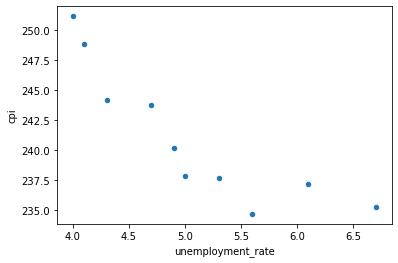

In [6]:
import matplotlib.pyplot as plt

# Use merge_ordered() to merge inflation, unemployment with inner join
inflation_unemploy = pd.merge_ordered(inflation, unemployment, on="date", how="inner")

# Print inflation_unemploy 
print(inflation_unemploy)

# Plot a scatter plot of unemployment_rate vs cpi of inflation_unemploy
inflation_unemploy.plot(x="unemployment_rate", y="cpi", kind="scatter")
plt.show()

### 03-merge_ordered() caution, multiple columns

* Use `merge_ordered()` on `gdp` and `pop`, merging on columns `date` and `country` with the fill feature, save to `ctry_date`.

In [7]:
with open("dataset/pop.csv", "rb") as pop_file, open("dataset/gdp_date.csv", "rb") as gdp_date_file: 
    pop = pd.read_csv(pop_file)
    gdp = pd.read_csv(gdp_date_file)

In [8]:
# Merge gdp and pop on date and country with fill and notice rows 2 and 3
ctry_date = pd.merge_ordered(gdp, pop, on=["date","country"],
                             fill_method='ffill')

# Print ctry_date
print(ctry_date)

        date    country         gdp  series_code_x       pop series_code_y
0   1/1/1990  Australia  158051.132  NYGDPMKTPSAKD  17065100   SP.POP.TOTL
1   1/1/1990     Sweden   79837.846  NYGDPMKTPSAKD   8558835   SP.POP.TOTL
2   1/1/1991  Australia  156195.954  NYGDPMKTPSAKD  17284000   SP.POP.TOTL
3   1/1/1991     Sweden   79524.242  NYGDPMKTPSAKD   8617375   SP.POP.TOTL
4   1/1/1992  Australia  157916.081  NYGDPMKTPSAKD  17495000   SP.POP.TOTL
5   1/1/1992     Sweden   79390.922  NYGDPMKTPSAKD   8668067   SP.POP.TOTL
6   1/1/1993  Australia  165097.495  NYGDPMKTPSAKD  17667000   SP.POP.TOTL
7   1/1/1993     Sweden   75783.588  NYGDPMKTPSAKD   8718561   SP.POP.TOTL
8   4/1/1990  Australia  158263.582  NYGDPMKTPSAKD   8718561   SP.POP.TOTL
9   4/1/1990     Sweden   80582.286  NYGDPMKTPSAKD   8718561   SP.POP.TOTL
10  4/1/1991  Australia  155989.033  NYGDPMKTPSAKD   8718561   SP.POP.TOTL
11  4/1/1991     Sweden   79073.059  NYGDPMKTPSAKD   8718561   SP.POP.TOTL
12  4/1/1992  Australia  

* Perform the same merge of `gdp` and `pop`, but join on `country` and date (reverse of step 1) with the fill feature, saving this as `date_ctry`.


In [9]:
# Merge gdp and pop on country and date with fill
date_ctry = pd.merge_ordered(gdp, pop, on=["country", "date"],
                             fill_method='ffill')
# Print date_ctry
print(date_ctry)

        date    country         gdp  series_code_x       pop series_code_y
0   1/1/1990  Australia  158051.132  NYGDPMKTPSAKD  17065100   SP.POP.TOTL
1   1/1/1991  Australia  156195.954  NYGDPMKTPSAKD  17284000   SP.POP.TOTL
2   1/1/1992  Australia  157916.081  NYGDPMKTPSAKD  17495000   SP.POP.TOTL
3   1/1/1993  Australia  165097.495  NYGDPMKTPSAKD  17667000   SP.POP.TOTL
4   4/1/1990  Australia  158263.582  NYGDPMKTPSAKD  17667000   SP.POP.TOTL
5   4/1/1991  Australia  155989.033  NYGDPMKTPSAKD  17667000   SP.POP.TOTL
6   4/1/1992  Australia  159047.827  NYGDPMKTPSAKD  17667000   SP.POP.TOTL
7   4/1/1993  Australia  166027.059  NYGDPMKTPSAKD  17667000   SP.POP.TOTL
8   7/1/1990  Australia  157329.279  NYGDPMKTPSAKD  17667000   SP.POP.TOTL
9   7/1/1991  Australia  156635.858  NYGDPMKTPSAKD  17667000   SP.POP.TOTL
10  7/1/1992  Australia  160658.176  NYGDPMKTPSAKD  17667000   SP.POP.TOTL
11  7/1/1993  Australia  166203.179  NYGDPMKTPSAKD  17667000   SP.POP.TOTL
12  9/1/1990  Australia  

### 04-Using merge_asof() to study stocks

* Use `merge_asof()` to merge `jpm` (left table) and `wells` together on the `date_time` column, where the rows with the nearest times are matched, and with `suffixes=('', '_wells')`. Save to `jpm_wells`.

* Use `merge_asof()` to merge `jpm_wells` (left table) and `bac` together on the `date_time` column, where the rows with the closest times are matched, and with `suffixes=('_jpm', '_bac')`. Save to `jpm_wells_bac`.

* Using `price_diffs`, create a line plot of the close price of JPM, WFC, and BAC only.

In [51]:
with open("dataset/jpm.csv", "rb") as f1, open("dataset/wells.csv", "rb") as f2, open("dataset/bac.csv") as f3:
    jpm= pd.read_csv(f1)
    wells=pd.read_csv(f2)
    bac=pd.read_csv(f3)

# Convert date_time column from string into Timestamp
jpm.date_time = pd.to_datetime(jpm.date_time)
wells.date_time = pd.to_datetime(wells.date_time)
bac.date_time = pd.to_datetime(bac.date_time)

In [72]:
dfs_comparasion = jpm.merge(wells, on= jpm.index, how="outer", suffixes=("_jpm", "_wells"))
dfs_comparasion

,key_0,date_time_jpm,close_jpm,date_time_wells,close_wells
0,0,2017-11-17 15:35:00,98.120,2017-11-17 15:35:00,54.323
1,1,2017-11-17 15:40:00,98.180,2017-11-17 15:40:00,54.320
2,2,2017-11-17 15:45:00,97.731,2017-11-17 15:45:00,54.190
3,3,2017-11-17 15:50:00,97.740,2017-11-17 15:50:00,54.170
4,4,2017-11-17 15:55:00,97.815,2017-11-17 15:55:00,54.184
5,5,2017-11-17 16:00:00,98.020,2017-11-17 16:00:00,54.265
6,6,2017-11-17 16:05:00,97.800,2017-11-17 16:05:00,54.200
7,7,2017-11-17 16:10:00,97.840,2017-11-17 16:10:00,54.155
8,8,2017-11-17 16:15:00,97.710,2017-11-17 16:15:00,54.190
9,9,2017-11-17 16:20:00,97.760,2017-11-17 16:20:00,54.205


In [71]:
# Use merge_asof() to merge jpm and wells
jpm_wells = pd.merge_asof(jpm, wells, on="date_time", suffixes=('', '_wells')) 
jpm_wells

,date_time,close,close_wells
0,2017-11-17 15:35:00,98.120,54.323
1,2017-11-17 15:40:00,98.180,54.320
2,2017-11-17 15:45:00,97.731,54.190
3,2017-11-17 15:50:00,97.740,54.170
4,2017-11-17 15:55:00,97.815,54.184
5,2017-11-17 16:00:00,98.020,54.265
6,2017-11-17 16:05:00,97.800,54.200
7,2017-11-17 16:10:00,97.840,54.155
8,2017-11-17 16:15:00,97.710,54.190
9,2017-11-17 16:20:00,97.760,54.205


In [73]:
dfs_comparasion_2 = jpm_wells.merge(bac, on= jpm_wells.index, how="outer", suffixes=("_jpm", "_bac"))
dfs_comparasion_2

,key_0,date_time_jpm,close_jpm,close_wells,date_time_bac,close_bac
0,0,2017-11-17 15:35:00,98.120,54.323,2017-11-17 15:35:00,26.552
1,1,2017-11-17 15:40:00,98.180,54.320,2017-11-17 15:40:00,26.552
2,2,2017-11-17 15:45:00,97.731,54.190,2017-11-17 15:45:00,26.388
3,3,2017-11-17 15:50:00,97.740,54.170,2017-11-17 15:50:00,26.378
4,4,2017-11-17 15:55:00,97.815,54.184,2017-11-17 15:55:00,26.383
5,5,2017-11-17 16:00:00,98.020,54.265,2017-11-17 16:00:00,26.452
6,6,2017-11-17 16:05:00,97.800,54.200,2017-11-17 16:05:00,26.373
7,7,2017-11-17 16:10:00,97.840,54.155,2017-11-17 16:10:00,26.388
8,8,2017-11-17 16:15:00,97.710,54.190,2017-11-17 16:15:00,26.369
9,9,2017-11-17 16:20:00,97.760,54.205,2017-11-17 16:20:00,26.388


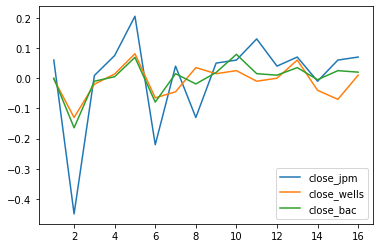

In [74]:
# Use merge_asof() to merge jpm and wells
jpm_wells = pd.merge_asof(jpm, wells, on="date_time",direction="nearest", suffixes=('', '_wells')) 


# Use merge_asof() to merge jpm_wells and bac
jpm_wells_bac = pd.merge_asof(jpm_wells, bac, on="date_time",direction='nearest', suffixes=('_jpm', '_bac'))


# Compute price diff
price_diffs = jpm_wells_bac.diff()

# Plot the price diff of the close of jpm, wells and bac only
price_diffs.plot(y=["close_jpm", "close_wells", "close_bac"])
plt.show()

### 05-Using merge_asof() to create dataset

* Using `merge_asof()`, merge `gdp` and `recession` on `date`, with `gdp` as the left table. Save to the variable `gdp_recession`.

* Create a `list` using a list comprehension and a conditional expression, named `is_recession`, where for each row if the `gdp_recession['econ_status']` value is equal to 'recession' then enter `'r'` else `'g'`.

* Using `gdp_recession`, plot a bar chart of `gdp` versus `date`, setting the `color` argument equal to `is_recession`.


In [79]:
with open("dataset/gdp_date_02.csv", "rb") as f1, open("dataset/recession.csv", "rb") as f2: 
    gdp = pd.read_csv(f1)
    recession = pd.read_csv(f2) 

In [82]:
# Convert date_time column from string into Timestamp
gdp.date = pd.to_datetime(gdp.date)
recession.date = pd.to_datetime(recession.date)

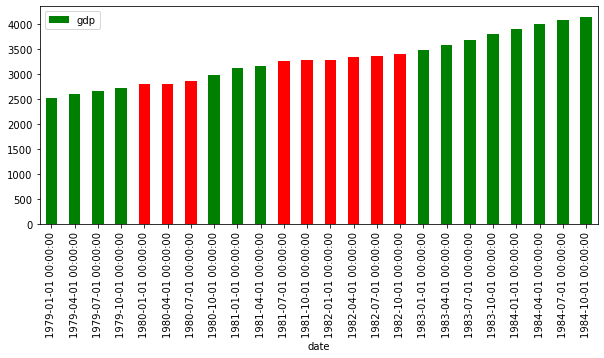

In [90]:
# Merge gdp and recession on date using merge_asof()
gdp_recession = pd.merge_asof(gdp,recession, on="date")

# Create a list based on the row value of gdp_recession['econ_status']
is_recession = ['r' if s=='recession' else 'g' for s in gdp_recession['econ_status']]

# Plot a bar chart of gdp_recession
gdp_recession.plot(kind="bar", y="gdp", x="date", color=is_recession, rot=90, figsize=(10,4))
plt.show()

### 06-Subsetting rows with .query()

* Use `merge_ordered()` on `gdp` and `pop` on columns `country` and `date` with the fill feature, save to `gdp_pop` and print.




In [91]:
with open("dataset/pop.csv", "rb") as pop_file, open("dataset/gdp_date.csv", "rb") as gdp_date_file: 
    pop = pd.read_csv(pop_file)
    gdp = pd.read_csv(gdp_date_file)

In [94]:
# Merge gdp and pop on date and country with fill
gdp_pop = pd.merge_ordered(gdp, pop, on=['country','date'], fill_method='ffill')

* Add a column named `gdp_per_capita` to `gdp_pop` that divides `gdp` by `pop`.

In [97]:
# Add a column named gdp_per_capita to gdp_pop that divides the gdp by pop
gdp_pop['gdp_per_capita'] = gdp_pop['gdp'] / gdp_pop['pop']

* Pivot `gdp_pop` so `values='gdp_per_capita'`, `index='date'`, and `columns='country'`, save as `gdp_pivot`.



In [99]:
# Pivot table of gdp_per_capita, where index is date and columns is country
gdp_pivot = gdp_pop.pivot_table(values='gdp_per_capita', index='date', columns='country')
gdp_pivot

country,Australia,Sweden
date,,
1/1/1990,0.009262,0.009328
1/1/1991,0.009037,0.009228
1/1/1992,0.009026,0.009159
1/1/1993,0.009345,0.008692
4/1/1990,0.008958,0.009243
4/1/1991,0.008829,0.009070
4/1/1992,0.009003,0.009068
4/1/1993,0.009398,0.008798
7/1/1990,0.008905,0.009173


* Use `.query()` to select rows from `gdp_pivot` where `date` is greater than equal to `"1991-01-01"`. Save as `recent_gdp_pop`.

In [100]:
# Select dates equal to or greater than 1991-01-01
recent_gdp_pop = gdp_pivot.query('date >= "1991-1-1"')

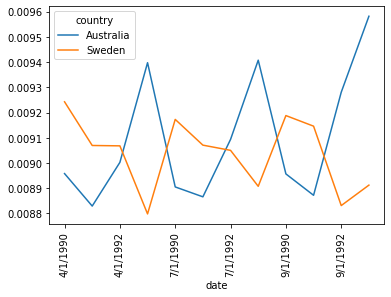

In [101]:
# Plot recent_gdp_pop
recent_gdp_pop.plot(rot=90)
plt.show()

### 07-Using .melt() to reshape government data

* Use `.melt()` to unpivot all of the columns of ur_wide except year and ensure that the columns with the months and values are named `month` and `unempl_rate`, respectively. Save the result as `ur_tall`.
* Add a column to `ur_tall` named `date` which combines the year and month columns as year-month format into a larger string, and converts it to a date data type.
* Sort ur_tall by date and save as ur_sorted.
* Using ur_sorted, plot `unempl_rate` on the y-axis and `date` on the x-axis.
 

In [4]:
with open("dataset/ur_wide.csv", "rb") as f1: 
    ur_wide = pd.read_csv(f1) 

ur_wide

,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,2010,9.8,9.8,9.9,9.9,9.6,9.4,9.4,9.5,9.5,9.4,9.8,9.3
1,2011,9.1,9.0,9.0,9.1,9.0,9.1,9.0,9.0,9.0,8.8,8.6,8.5
2,2012,8.3,8.3,8.2,8.2,8.2,8.2,8.2,8.1,7.8,7.8,7.7,7.9
3,2013,8.0,7.7,7.5,7.6,7.5,7.5,7.3,7.2,7.2,7.2,6.9,6.7
4,2014,6.6,6.7,6.7,6.2,6.3,6.1,6.2,6.1,5.9,5.7,5.8,5.6
5,2015,5.7,5.5,5.4,5.4,5.6,5.3,5.2,5.1,5.0,5.0,5.1,5.0
6,2016,4.9,4.9,5.0,5.0,4.8,4.9,4.8,4.9,5.0,4.9,4.7,4.7
7,2017,4.7,4.6,4.4,4.4,4.4,4.3,4.3,4.4,4.2,4.1,4.2,4.1
8,2018,4.1,4.1,4.0,4.0,3.8,4.0,3.8,3.8,3.7,3.8,3.7,3.9
9,2019,4.0,3.8,3.8,3.6,3.6,3.7,3.7,3.7,3.5,3.6,3.5,3.5


In [28]:
# unpivot everything besides the year column
ur_tall = ur_wide.melt(id_vars=["year"], var_name=["month"], value_name="unempl_rate")

# Create a date column using the month and year columns of ur_tall
ur_tall['date'] = pd.to_datetime(ur_tall['year'].apply(str) + '-' + ur_tall['month'])

ur_sorted = ur_tall.sort_values("date")

In [30]:
# Create a date column using the month and year columns of ur_tall
ur_tall['date'] = pd.to_datetime(ur_tall['year'].apply(str) + '-' + ur_tall['month'])

# Sort ur_tall by date in ascending order
ur_sorted = ur_tall.sort_values("date")
ur_sorted

,year,month,unempl_rate,date
0,2010,jan,9.8,2010-01-01
11,2010,feb,9.8,2010-02-01
22,2010,mar,9.9,2010-03-01
33,2010,apr,9.9,2010-04-01
44,2010,may,9.6,2010-05-01
...,...,...,...,...
87,2020,aug,NaN,2020-08-01
98,2020,sep,NaN,2020-09-01
109,2020,oct,NaN,2020-10-01
120,2020,nov,NaN,2020-11-01


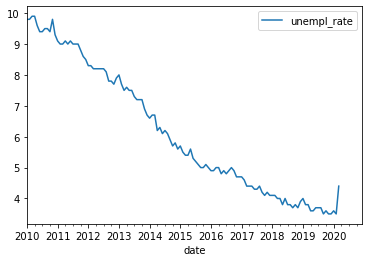

In [35]:
# Plot the unempl_rate by date
ur_sorted.plot(y="unempl_rate", x="date")
plt.show()

### 08-Using .melt() for stocks vs bond performance

* Use `.melt()` on `ten_yr` to unpivot everything except the `metric` column, setting `var_name='date'` and `value_name='close'`. Save the result to `bond_perc`.

* Using the `.query()` method, select only those rows were `metric` equals 'close', and save to `bond_perc_close`.

* Use `merge_ordered()` to merge `dji` (left table) and `bond_perc_close` on `date` with an inner join, and set `suffixes` equal to `('_dow', '_bond')`. Save the result to `dow_bond`.

* Using `dow_bond`, plot only the Dow and bond values.


In [42]:
with open("dataset/ten_yr.csv", "rb") as f1:
    ten_yr = pd.read_csv(f1)
ten_yr

,metric,2007-02-01,2007-03-01,2007-04-01,2007-05-01,2007-06-01,2007-07-01,2007-08-01,2007-09-01,2007-10-01,...,2009-03-01,2009-04-01,2009-05-01,2009-06-01,2009-07-01,2009-08-01,2009-09-01,2009-10-01,2009-11-01,2009-12-01
0,open,0.033,-0.060,0.025,-0.004,0.061,0.027,-0.059,-0.046,0.014,...,0.046,-0.103,0.191,0.107,0.024,-0.007,-0.047,-0.032,0.034,-0.051
1,high,-0.007,-0.041,0.022,0.031,0.080,-0.022,-0.060,-0.038,0.004,...,-0.004,0.041,0.187,0.068,-0.062,0.032,-0.090,0.012,-0.004,0.099
2,low,-0.016,-0.008,0.031,-0.002,0.059,-0.027,-0.052,-0.043,0.003,...,-0.062,0.069,0.168,0.123,-0.055,0.040,-0.036,-0.051,0.030,0.007
3,close,-0.057,0.022,-0.004,0.056,0.029,-0.052,-0.049,0.009,-0.023,...,-0.117,0.164,0.109,0.017,-0.006,-0.029,-0.028,0.026,-0.056,0.201


In [45]:
# Use melt on ten_yr, unpivot everything besides the metric column
bond_perc = ten_yr.melt(id_vars=["metric"], var_name='date',  value_name='close')
bond_perc

,metric,date,close
0,open,2007-02-01,0.033
1,high,2007-02-01,-0.007
2,low,2007-02-01,-0.016
3,close,2007-02-01,-0.057
4,open,2007-03-01,-0.060
...,...,...,...
135,close,2009-11-01,-0.056
136,open,2009-12-01,-0.051
137,high,2009-12-01,0.099
138,low,2009-12-01,0.007


In [67]:
# Use query on bond_perc to select only the rows where metric=close
bond_perc_close = bond_perc.query("metric == 'close'").copy()
bond_perc_close['date'] = pd.to_datetime(bond_perc_close['date'])


In [76]:
with open("dataset/dji.csv") as f2: 
    dji = pd.read_csv(f2)

dji['date'] = pd.to_datetime(dji['date'])
dji

,date,close
0,2007-02-01,0.00509
1,2007-03-01,-0.02610
2,2007-04-01,0.04850
3,2007-05-01,0.05200
4,2007-06-01,-0.01610
...,...,...
154,2019-12-01,NaN
155,2020-01-01,NaN
156,2020-02-01,-0.01050
157,2020-03-01,-0.21600


In [77]:
dow_bond = pd.merge_ordered(dji, bond_perc_close, on="date", how="inner", suffixes=('_dow', '_bond'))
dow_bond.head()

,date,close_dow,metric,close_bond
0,2007-02-01,0.00509,close,-0.057
1,2007-03-01,-0.02610,close,0.022
2,2007-04-01,0.04850,close,-0.004
3,2007-05-01,0.05200,close,0.056
4,2007-06-01,-0.01610,close,0.029


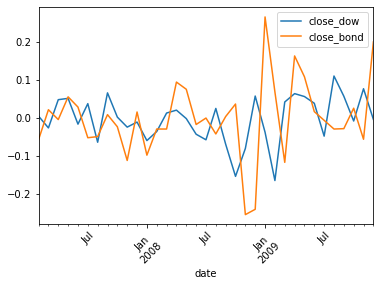

In [78]:
# Plot only the close_dow and close_bond columns
dow_bond.plot(y=["close_dow","close_bond"], x='date', rot=45)
plt.show()

==================================
### `The End`
==================================